# ANALYSING VIDEO GAME PUBLISHER STOCK PRICE DATA USING PYTHON

Given a large dataset consisting of the monthly share price data of 10 of the largest video game publishers/studios, we were tasked with modifying, analysing and plotting the dataset using python libraries.

ToDo:

1.   Convert any currency into its INR equivalent
2.   Drop the "Adj Close" and the "Currency" columns
3.   Create a new dataframe to store the maxima and minima for the remaining columns of each company
4.   Add two more columns to store the profit per volume and total profit for every month of every company
5.   Plot both profit columns wrt time(Date column)





In [3]:
import pandas as pd

df = pd.read_csv("Top10VideoGameStocks.csv")
df = df.drop(["Adj Close"], axis =1) ## Dropped "Adj Close"

currencies = df["Currency"].unique()
inr_factor = [0.56, 10.88, 84.56, 7.76]

price_columns = ["Open", "High", "Low", "Close"]

for index, rows in df.iterrows():
  for column in price_columns:
    df.at[index, column] = df.at[index, column] * inr_factor[list(currencies).index(df.at[index, "Currency"])]

df = df.drop(["Currency"], axis = 1) ## Dropped Currency

df.head()

,Date,Company,Ticker Symbol,Open,High,Low,Close,Volume
0,2000-01-01,Sony Interactive Entertainment,SONY,15.9740,16.3345,11.676,14.168,147012000
1,2000-02-01,Sony Interactive Entertainment,SONY,14.1645,17.6260,14.000,17.556,67437000
2,2000-03-01,Sony Interactive Entertainment,SONY,16.8560,17.5280,12.152,15.687,112674000
3,2000-04-01,Sony Interactive Entertainment,SONY,15.8200,15.8200,12.495,12.635,74071000
4,2000-05-01,Sony Interactive Entertainment,SONY,12.7120,13.1495,9.940,10.213,65035500


The `extremas_df` dataframe was manually created to store the maximum and minimum of the open, close, high, low and volume columns for all 10 companies.

In [4]:
num_columns = price_columns + ["Volume"]

extremas_df = pd.DataFrame(columns=["Company",
                                    "open_max", "open_min",
                                    "high_max","high_min",
                                    "low_max","low_min",
                                    "close_max","close_min",
                                    "volume_max","volume_min"])
companies = df.Company.unique()
for company in companies:
  company_df = df[df['Company'] == company]
  row = [company]
  for column in num_columns:
    row.append(company_df[column].max())
    row.append(company_df[column].min())
  extremas_df.loc[len(extremas_df)] = row

extremas_df.head(10)

,Company,open_max,open_min,high_max,high_min,low_max,low_min,close_max,close_min,volume_max,volume_min
0,Sony Interactive Entertainment,16.856000,1.088640,17.626000,1.265600,14.000000,1.071840,17.556000,1.090880,835493500,24017500
1,Tencent Interactive Entertainment,7000.799219,7.371897,7778.108281,7.973680,6644.741523,6.770113,6835.307539,7.371897,1277783837,233420548
2,Microsoft Gaming,37938.689910,1349.577603,39603.676516,1596.492729,34856.476877,1257.407190,37794.093032,1365.643968,3044579400,342370400
3,Nintendo,1349.577603,152.207996,1396.085619,176.730393,1229.671505,113.310403,1361.754248,155.590403,489399500,1597000
4,NetEase Games,10044.036697,2.705920,11358.944955,2.705920,9010.713394,2.156280,9972.160826,2.705920,2848722000,0
5,Electronic Arts,12827.751742,972.440000,12980.805135,1065.456032,12189.323484,910.711239,12837.899819,931.851239,326665200,31702900
6,Take-Two Interactive,17645.135045,399.686955,18172.789910,658.863360,16219.453394,363.044243,17570.721832,398.559449,151280400,8119500
7,Embracer Group,1012.680000,39.058663,1045.271976,43.326664,926.155988,35.049328,1011.128024,38.929328,340488254,1801158
8,Roblox Corporation,10835.518348,2420.107271,11973.696516,2500.862065,7886.910916,1830.723968,10663.015871,2392.202477,875548700,107105000
9,Playtika,2551.175206,596.993595,2967.210413,619.824794,2410.805619,528.500000,2515.660000,596.148016,77570500,11134800


`profit_df` has two columns that store the Profit per Volume, and Total Profit for a given stock for any given month.

*   Profit per Volume = High - Low
*   Total Profit  = (Profit per Volume)*Volume

`profit_df` is then joined to `df`, i.e. the two columns are now a part of the original dataframe.

In [6]:
profit_df = pd.DataFrame(columns=["PerVolume", "Total"])
profit_df["PerVolume"] = df["High"] - df["Low"]
profit_df["Total"] = profit_df["PerVolume"] * df["Volume"]
df = df.join(profit_df)

profit_df.head()

,PerVolume,Total
0,4.658500,6.848554e+08
1,3.626000,2.445266e+08
2,5.375999,6.057353e+08
3,3.325000,2.462861e+08
4,3.209500,2.087315e+08


Using Matplotlib, we plot both of the new columns wrt the Date column.

The line: `df["Date"] = pd.to_datetime(df["Date"])` is necessary, without it, the program wouldn't be able to differentiate the data in the date column from other data in a desirable fashion.  

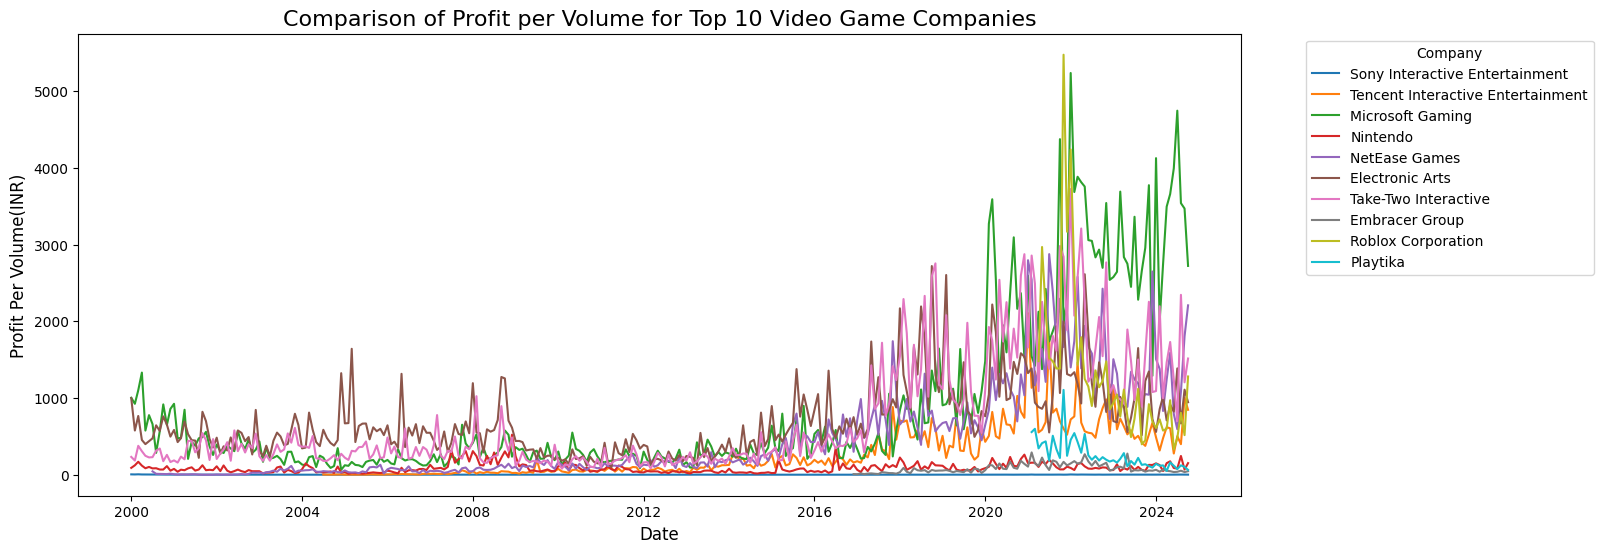

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
df["Date"] = pd.to_datetime(df["Date"])
for company in companies:
  company_df = df[df['Company'] == company]
  plt.plot(company_df["Date"], company_df["PerVolume"], label=company)
plt.title('Comparison of Profit per Volume for Top 10 Video Game Companies', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Profit Per Volume(INR)', fontsize=12)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

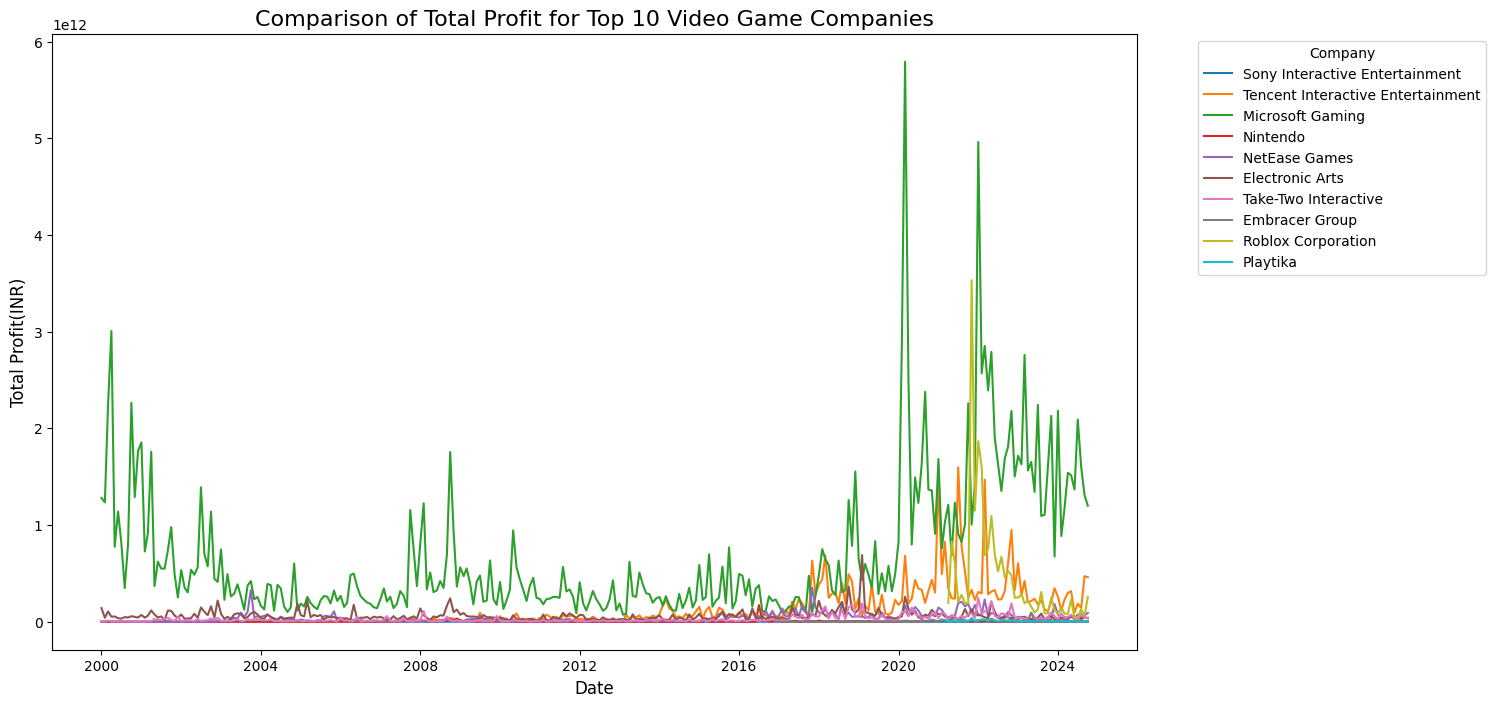

In [43]:
plt.figure(figsize=(14,8))
df["Date"] = pd.to_datetime(df["Date"])
for company in companies:
  company_df = df[df['Company'] == company]
  plt.plot(company_df["Date"], company_df["Total"], label=company)
plt.title('Comparison of Total Profit for Top 10 Video Game Companies', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Profit(INR)', fontsize=12)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()